In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [4]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

In [5]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

In [6]:
max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

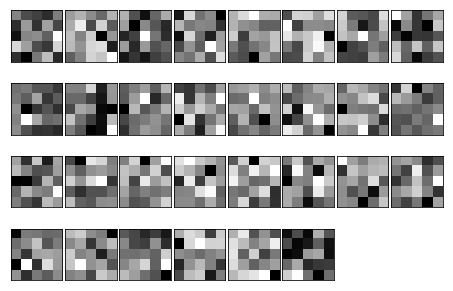

In [7]:
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

In [8]:
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.29984078216
=== epoch:1, train acc:0.162, test acc:0.135 ===
train loss:2.29792170683
train loss:2.29284621127
train loss:2.28669777883
train loss:2.28357993657
train loss:2.27461831232
train loss:2.26365301064
train loss:2.24828159816
train loss:2.22171426749
train loss:2.20688877958
train loss:2.16408499105
train loss:2.12289847974
train loss:2.07722876202
train loss:2.08568898227
train loss:1.95958455885
train loss:1.93200891241
train loss:1.86425647506
train loss:1.8589332532
train loss:1.82208318969
train loss:1.66180156848
train loss:1.6480220611
train loss:1.50758522279
train loss:1.45808297142
train loss:1.45304497889
train loss:1.34909685383
train loss:1.22166768407
train loss:1.14716586396
train loss:1.07459096105
train loss:0.971591555196
train loss:1.00599333302
train loss:0.941547076567
train loss:0.903192005064
train loss:0.879088008739
train loss:0.874078596477
train loss:0.81911385769
train loss:0.726826730306
train loss:0.759556359281
train loss:0.77377528

Saved Network Parameters!


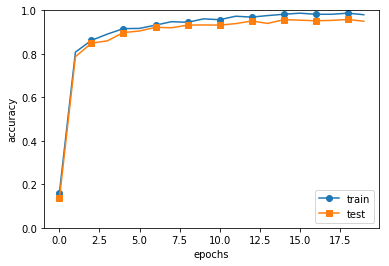

In [9]:
# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()